In [55]:
# exploratory notebook for Salty Hackers

In [56]:
# api data imports 
import pandas as pd
import numpy as np
import json
import sqlite3
import urllib
import time
import requests

In [168]:
from warnings import filterwarnings
filterwarnings("ignore")

In [57]:
html = urllib.request.urlopen('https://hacker-news.firebaseio.com/v0/item/2169746.json?print=pretty')
json.loads(html.read())

{'by': 'timrobinson',
 'id': 2169746,
 'parent': 2169669,
 'text': "After being down all day yesterday, the site's now working for me.<p>Not much crime in my small part of south-east London, except for an ominous 'other crime' at the end of the street...",
 'time': 1296642293,
 'type': 'comment'}

In [58]:
x = urllib.request.urlopen('https://hacker-news.firebaseio.com/v0/maxitem.json?print=pretty')
last_num = x.read()
print(last_num)

b'23302764\n'


In [59]:
# the last hacker news item id is 23302173 so we could query the last thousand or few thousand. 

In [60]:
# initialize empty json list
json_obj = []

In [66]:
# get data from hacker news
for i in range(2330000,23302173):
    html = urllib.request.urlopen('https://hacker-news.firebaseio.com/v0/item/' + str(i) + '.json')
    json_obj.append(json.loads(html.read()))
    if i % 50 == 0:
        print(i)

2330000
2330050
2330100
2330150
2330200
2330250
2330300
2330350
2330400
2330450
2330500
2330550
2330600
2330650
2330700
2330750
2330800
2330850
2330900
2330950
2331000
2331050
2331100
2331150
2331200


URLError: <urlopen error EOF occurred in violation of protocol (_ssl.c:1045)>

In [68]:
json_obj[8]

{'by': 'Darrel',
 'id': 2330008,
 'parent': 2328462,
 'text': 'A REST API should be simple to use.  However, it is frequently not easy to build a simple REST API.',
 'time': 1300232821,
 'type': 'comment'}

In [74]:
df = pd.DataFrame.from_records(json_obj)

In [76]:
print(df.shape)
df.head()

(1817, 13)


,by,id,kids,parent,text,time,type,descendants,score,title,url,deleted,dead
0,tsuyoshi,2330000,[2330141],2329842.0,There was a major power outage in much of the ...,1.300233e+09,comment,NaN,NaN,NaN,NaN,NaN,NaN
1,msredmond,2330001,NaN,NaN,,1.300233e+09,story,0.0,2.0,Oracle Delivers Mobile Java Framework for Cros...,http://adtmag.com/articles/2011/03/15/mobile-j...,NaN,NaN
2,mkramlich,2330002,NaN,2329175.0,Agreed. What you lose is about 99% ads or game...,1.300233e+09,comment,NaN,NaN,NaN,NaN,NaN,NaN
3,mistermann,2330003,[2330276],2329842.0,This is probably a presumptuous or naive state...,1.300233e+09,comment,NaN,NaN,NaN,NaN,NaN,NaN
4,michaeldhopkins,2330004,"[2330498, 2330148, 2331584, 2330027]",2329949.0,"No, they have not. Roman Briton was a differen...",1.300233e+09,comment,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df = df.drop(columns = ['deleted', 'dead'])
df.head()

,by,id,kids,parent,text,time,type,descendants,score,title,url
0,tsuyoshi,2330000,[2330141],2329842.0,There was a major power outage in much of the ...,1.300233e+09,comment,NaN,NaN,NaN,NaN
1,msredmond,2330001,NaN,NaN,,1.300233e+09,story,0.0,2.0,Oracle Delivers Mobile Java Framework for Cros...,http://adtmag.com/articles/2011/03/15/mobile-j...
2,mkramlich,2330002,NaN,2329175.0,Agreed. What you lose is about 99% ads or game...,1.300233e+09,comment,NaN,NaN,NaN,NaN
3,mistermann,2330003,[2330276],2329842.0,This is probably a presumptuous or naive state...,1.300233e+09,comment,NaN,NaN,NaN,NaN
4,michaeldhopkins,2330004,"[2330498, 2330148, 2331584, 2330027]",2329949.0,"No, they have not. Roman Briton was a differen...",1.300233e+09,comment,NaN,NaN,NaN,NaN


In [85]:
#pd.set_option("display.max_colwidth", 1000)
df['text'][1000]

"All those things still have to be paid for by <i>someone</i> when you hire contractors. Which is probably why I always hear about contractors getting seemingly-absurd high hourly rates, if it <i>didn't</i> all come out about even, either we'd all be contractors or nobody would choose to be a contractor.<p>The <i>transaction costs</i> here are things like all the negotiation that has to go in to getting anything done with contractors every time you want something done."

In [193]:
comments_df = df[df['type'] == 'comment']

In [225]:
comments_df = comments_df.drop_duplicates(subset='text')

In [226]:
comments_df.shape
comments_df.head()

,by,id,kids,parent,text,time,type,descendants,score,title,url,vader_score,neg_score
0,tsuyoshi,2330000,[2330141],2329842.0,"There was a major power outage in much of the northeastern North America, affecting tens of millions of people, and almost no looting (aside from isolated incidents in Ottawa and Brooklyn) there either. There was a major terrorist attack in New York in 2001 and no looting. There was a major earthquake in San Francisco in 1989 and no looting. This statement that ""looting is something we see after almost every tragedy"" is simply not true.",1.300233e+09,comment,NaN,NaN,NaN,NaN,-0.9699,0.256
2,mkramlich,2330002,NaN,2329175.0,"Agreed. What you lose is about 99% ads or games or overly complicated restaurant websites UI's. For cases where its like a Flash video player, i just click on the NoFlash/ClickToFlash placeholder rectangle, that then allows the actual Flash asset to load, and I partake of it. I've generally seen less freezes, crashes and memory use since switching to this approach.",1.300233e+09,comment,NaN,NaN,NaN,NaN,0.5563,0.040
3,mistermann,2330003,[2330276],2329842.0,"This is probably a presumptuous or naive statement, but the very first thing that came to my mind was: if you have ever been to Japan, you wouldn't even think of asking this question.",1.300233e+09,comment,NaN,NaN,NaN,NaN,-0.1406,0.045
4,michaeldhopkins,2330004,"[2330498, 2330148, 2331584, 2330027]",2329949.0,"No, they have not. Roman Briton was a different society than pre-Roman Briton. The Anglo-Saxons came about 1500 years ago and nearly completely replaced the Britons, genetically and culturally. The Norman invasion was about 950 years ago and greatly changed Anglo-Saxon culture, although not as much as the AS changed post-Roman Briton. There were several other invaders (Danes, etc.) as well.<p>By contrast, the Japanese are perhaps 3,000 years old as a distinct ethnic group on the island.",1.300233e+09,comment,NaN,NaN,NaN,NaN,0.0000,0.000
5,kstenerud,2330005,"[2330039, 2330025]",2329991.0,"No. The Yakuza generally do not participate in civilian affairs, nor are they interested in ""policing"", except where someone becomes a personal nuisance to a higher-up or someone disrupts their business.<p>Their primary interest lies in the financial side of mizu-shobai type establishments, gambling, and money laundering.<p>They also offer thug-work-for-hire, which is helpful when the police aren't, but you've got to be careful dealing with them because there tend to be hidden costs to their ""help"".<p>* whoops. replied at the wrong level :P",1.300233e+09,comment,NaN,NaN,NaN,NaN,0.1829,0.083


In [227]:
comments_df['text'] = comments_df['text'].astype(str)

In [228]:
comments_df['text'][:5]

0                                                                                                              There was a major power outage in much of the northeastern North America, affecting tens of millions of people, and almost no looting (aside from isolated incidents in Ottawa and Brooklyn) there either. There was a major terrorist attack in New York in 2001 and no looting. There was a major earthquake in San Francisco in 1989 and no looting. This statement that "looting is something we see after almost every tragedy" is simply not true.
2                                                                                                                                                                                       Agreed. What you lose is about 99% ads or games or overly complicated restaurant websites UI's. For cases where its like a Flash video player, i just click on the NoFlash/ClickToFlash placeholder rectangle, that then allows the actual Flash asset to load, and I pa

# Text/Comment Analysis 

In [96]:
# text analysis imports
import nltk
import random
import re
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import f1_score, accuracy_score


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/masonnystrom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [229]:
def sentiment_analyzer_scores(text):
        score = analyzer.polarity_scores(text)
        str(text)
        return score['compound']
        # use for neg, neutral, and psoitive score 
        #print("{:-<40} {}".format(text, str(score)))

In [230]:
def neg_sentiment_analyzer_scores(text):
        score = analyzer.polarity_scores(text)
        str(text)
        return score['neg']

In [231]:
sentiment_analyzer_scores(comments_df['text'][6])

0.1733

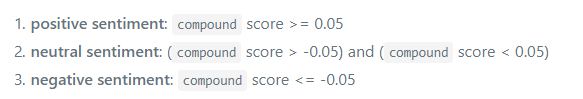

In [232]:
comments_df['vader_score'] = comments_df['text'].apply(sentiment_analyzer_scores)

In [233]:
comments_df['vader_score'].describe()

count    958.000000
mean       0.172269
std        0.523619
min       -0.994100
25%       -0.153100
50%        0.200600
75%        0.624900
max        0.991200
Name: vader_score, dtype: float64

In [234]:
comments_df['neg_score'] = comments_df['text'].apply(neg_sentiment_analyzer_scores)

In [235]:
comments_df['neg_score'].describe()

count    958.000000
mean       0.058016
std        0.082389
min        0.000000
25%        0.000000
50%        0.032000
75%        0.092000
max        1.000000
Name: neg_score, dtype: float64

In [ ]:
# get top 10 negatives/saltiest comments of all time

In [236]:
comments_df.sort_values(by=['neg_score'], ascending=False)[:50]

,by,id,kids,parent,text,time,type,descendants,score,title,url,vader_score,neg_score
56,pdaviesa,2330056,NaN,2329366.0,WTF?!,1.300234e+09,comment,NaN,NaN,NaN,NaN,-0.6239,1.000
525,patrickgzill,2330525,[2331975],2328232.0,A copyright infringement is a felony? Seriously?,1.300244e+09,comment,NaN,NaN,NaN,NaN,-0.8253,0.684
380,mort,2330380,NaN,2330330.0,Gooooo useless science!,1.300241e+09,comment,NaN,NaN,NaN,NaN,-0.4753,0.607
1675,podperson,2331083,NaN,2330551.0,"5 dead, 2 missing, 22 injured (including some severely).<p><a href=""http://www.nytimes.com/2011/03/16/world/asia/16workers.html?scp=1&#38;sq=reactor%2022&#38;st=cse"" rel=""nofollow"">http://www.nytimes.com/2011/03/16/world/asia/16workers.html?...</a>",1.300257e+09,comment,NaN,NaN,NaN,NaN,-0.8611,0.544
1402,swaits,2330810,"[2333016, 2333361, 2331333, 2331426]",2329541.0,Is MRI embarrassed yet?,1.300250e+09,comment,NaN,NaN,NaN,NaN,-0.3612,0.455
180,OstiaAntica,2330180,"[2330285, 2330366, 2330274, 2330473, 2330544]",2329907.0,The real issue is that these scanners violate the 4th Amendment and impose health risk for no gain in security.,1.300237e+09,comment,NaN,NaN,NaN,NaN,-0.7830,0.371
95,nivertech,2330095,[2330271],2330040.0,"Clear trends:<p>* Southern Europe/Mediterranean/Levantine countries - low suicide rates.<p>* English-speaking/Northern countries/former Communist block in Eastern Europe/Developed Asian countries - high suicide rates.<p>Seems to be related to amount of daylight, climate, stress and competition.",1.300235e+09,comment,NaN,NaN,NaN,NaN,-0.9349,0.362
258,16s,2330258,[2331901],2329963.0,"No need to berate the guy. We've all made silly mistakes before. Yes, I know that this is bad, but there's no need to send him harassing emails.",1.300238e+09,comment,NaN,NaN,NaN,NaN,-0.8820,0.355
514,georgieporgie,2330514,"[2330966, 2330817, 2330808]",2329907.0,"I bet you get more radiation during your flight. Still, if this fuels irrational public fear of scanners such that it outweighs irrational public fear of terrorism, I'll consider it a good thing.",1.300244e+09,comment,NaN,NaN,NaN,NaN,-0.9169,0.346
1268,Devilboy,2330676,NaN,2330330.0,The farmer that discovered the colony on his farm killed the infestation before the concrete was poured. They were doomed anyway.,1.300247e+09,comment,NaN,NaN,NaN,NaN,-0.8658,0.314


In [117]:
# get average score of users